<a href="https://colab.research.google.com/github/MarotiD/SATELLITE-IMAGE-CLASSSIFICATION-USING-CNN/blob/main/Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define paths to your directories
train_path = '/content/drive/MyDrive/SCT/TRAIN'
valid_path = '/content/drive/MyDrive/SCT/VALIDATION'
test_path = '/content/drive/MyDrive/SCT/TEST'


In [4]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# Define class names
class_names = ['cloudy', 'desert', 'green_area', 'water']

# Create ImageDataGenerator for preprocessing
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Create data generators for training, validation, and testing
train_batches = image_generator.flow_from_directory(directory=train_path,
                                                     target_size=(224,224),
                                                     classes=class_names,
                                                     batch_size=30)
valid_batches = image_generator.flow_from_directory(directory=valid_path,
                                                     target_size=(224,224),
                                                     classes=class_names,
                                                     batch_size=10)
test_batches = image_generator.flow_from_directory(directory=test_path,
                                                    target_size=(224,224),
                                                    classes=class_names,
                                                    batch_size=10,
                                                    shuffle=False)

Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [7]:
imgs,labels=next(train_batches)

In [8]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

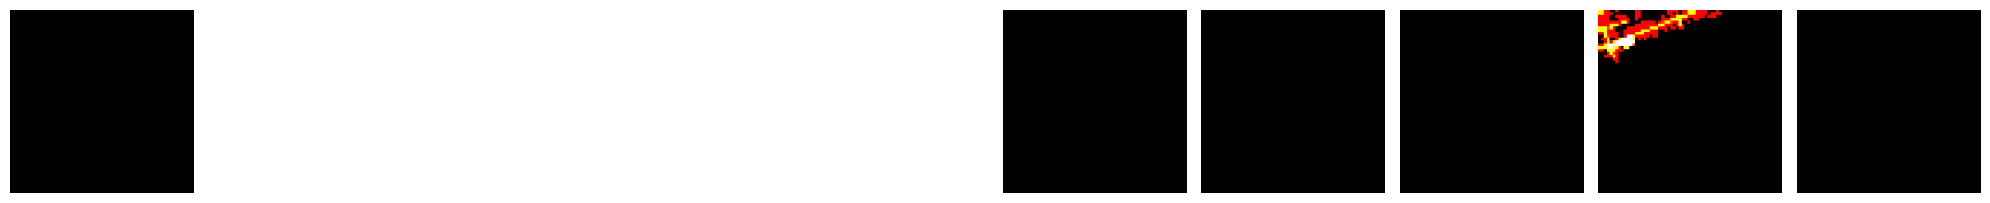

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [9]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [10]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Convolutional layer with 32 filters, each of size 3x3, ReLU activation, input shape of (224, 224, 3)
    MaxPooling2D((2, 2)),  # Max pooling layer with pool size of 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters, each of size 3x3, ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer with pool size of 2x2
    Flatten(),  # Flatten layer to convert the 2D output to 1D
    Dense(4, activation='softmax')  # Fully connected layer with 5 neurons (for 5 classes) and softmax activation
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 4)                 7

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_batches, validation_data=valid_batches, epochs=10, verbose=1)


Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 35.8806 - accuracy: 0.6580

In [ ]:
# Evaluate the model on test data
predictions = model.predict(test_batches, verbose=0)

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = class_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')